# Convolutional Neural Networks (CNNs) with iCubWorld 1.0 Dataset 

Dataset Link: https://robotology.github.io/iCubWorld/#icubworld-1-modal

Information about the dataset from the above link:

No. categories: 10

No. objects/category: 4

Acquisitions per object: human mode (train) 4 test sets available

No. frames/acquisition: 200

Tracking cue: Independent Motion

No. acquired cameras: 1

In [10]:
# importing of modules for iCubWorld CNN
# from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def load_dataset(batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)



    train_generator = train_datagen.flow_from_directory(
        'iCubWorld/'+'train',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        'iCubWorld/'+'train',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    test_generator = test_datagen.flow_from_directory(
        'iCubWorld/'+'test',
        target_size=(160, 160),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator, test_generator


## 1 Simple CNN Model

In [3]:
# network definition
def simpleCNN(img_rows, img_cols, img_ch, classes, dropout):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, img_ch)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(Dense(classes))
    model.add(Activation('softmax'))

    print('CNN network definition.')
    return model
    
simple_model = simpleCNN(160,160,3,10,0.5)
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
simple_model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
simple_model.summary()

CNN network definition.


/Users/chittesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   104,858,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,864,138 (400.02 MB)

 Trainable params: 104,864,138 (400.02 MB)

 Non-trainable params: 0 (0.00 B)

## 1.1 Training the Model

In [4]:
# training/fitting of the DNN model

train, validation, test = load_dataset()

early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,         
    restore_best_weights=True  
)

# training/fitting of the complex DNN model 
simple_history = simple_model.fit(train, batch_size=128, epochs=5,  verbose=1, validation_data=validation, callbacks=[early_stopping])



Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5


/Users/chittesh/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 288ms/step - accuracy: 0.1206 - loss: 7.1376 - val_accuracy: 0.1658 - val_loss: 2.2175
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 287ms/step - accuracy: 0.2181 - loss: 2.1389 - val_accuracy: 0.2842 - val_loss: 1.9932
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - accuracy: 0.2966 - loss: 1.8787 - val_accuracy: 0.3308 - val_loss: 1.7865
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 291ms/step - accuracy: 0.3545 - loss: 1.7552 - val_accuracy: 0.3950 - val_loss: 1.5973
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 290ms/step - accuracy: 0.4193 - loss: 1.5786 - val_accuracy: 0.4058 - val_loss: 1.5923


## 1.2 Testing and Evaluations

In [5]:
def graphs(history):
    
    # list all data in history
    print(history.history.keys())

    # summarize history for accuracy
    #plt.plot(mo)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


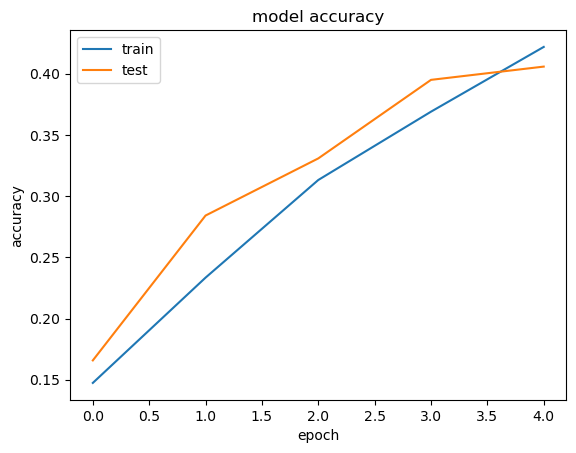

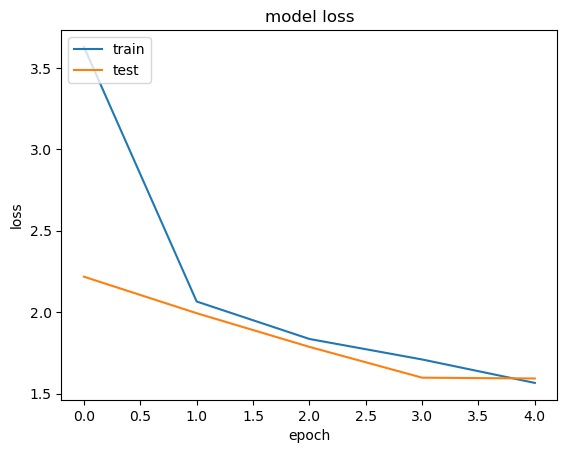

151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.5098 - loss: 1.3815

Test score/loss: 1.3809078931808472
Test accuracy: 0.5056226849555969


In [6]:
graphs(simple_history)
#Accuracies 
score = simple_model.evaluate(train, batch_size=128, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])
print(simple_history)




## 2 Complex CNN Model

In [13]:
N_EPOCH = 40 # 40 bigger network will benefit from extra training epochs

def complexCNN(img_rows, img_cols, img_ch, classes, dropout):
    # Complex DNN model definition
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(img_rows, img_cols, img_ch)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

complex_model = complexCNN(160,160,3,10,0.5)

    
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
complex_model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
complex_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,609,002 (21.40 MB)

 Trainable params: 5,609,002 (21.40 MB)

 Non-trainable params: 0 (0.00 B)

## 2.1 Training the Model

In [14]:
# training/fitting of the DNN model

train, validation, test = load_dataset()

early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,         
    restore_best_weights=True  
)

# training/fitting of the complex DNN model 
complex_history = complex_model.fit(train, batch_size=128, epochs=5,  verbose=1, validation_data=validation, callbacks=[early_stopping])


Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 54s 350ms/step - accuracy: 0.1511 - loss: 2.2027 - val_accuracy: 0.2358 - val_loss: 1.9596
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 345ms/step - accuracy: 0.3582 - loss: 1.7483 - val_accuracy: 0.3433 - val_loss: 1.7416
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 345ms/step - accuracy: 0.4788 - loss: 1.3562 - val_accuracy: 0.4992 - val_loss: 1.2447
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 345ms/step - accuracy: 0.5884 - loss: 1.0905 - val_accuracy: 0.5742 - val_loss: 1.0771
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 54s 350ms/step - accuracy: 0.6755 - loss: 0.8694 - val_accuracy: 0.6625 - val_loss: 0.8743


## 2.2 Testing and Evaluations 

In [17]:
# def graphs(history):
    
#     # list all data in history
#     print(history.history.keys())

#     # summarize history for accuracy
#     #plt.plot(mo)
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
# #     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

#     # summarize history for loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

def graphs(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.7803 - loss: 0.5863

Test score/loss: 0.5830600261688232
Test accuracy: 0.785506010055542


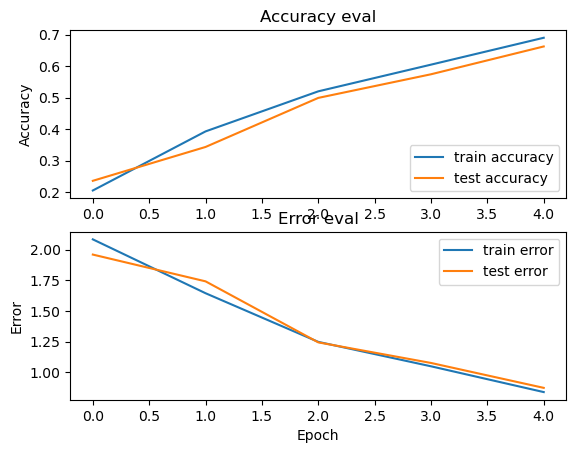

In [18]:
#Accuracies 
score = complex_model.evaluate(train, batch_size=128, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

graphs(complex_history)

## 3 Experiments

## 3.1 Experiment-1: Number of Epochs

In [9]:
diff_epochs = [5,10,20,50]
# diff_epochs = [5,8,12,20]
# diff_epochs = [5,8,12]
all_accs = []
all_losses = []


model = simpleCNN(160,160,3,10,0.5)
#     model = complexCNN(160,160,3,10,0.5)
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
train, validation,  test = load_dataset()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)
history = model.fit(train, batch_size=128, epochs=150,  verbose=1, validation_data=validation, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(train, batch_size=128, verbose=1)
all_accs.append(history.history['accuracy'])
all_losses.append(history.history['loss'])
# print(f"number of epochs: {num}, test loss: {test_loss}, test accuracy: {test_acc}")








# history = model.fit(train, batch_size=128, epochs=num,  verbose=1, validation_data=validation, callbacks=[early_stopping])






# for num in diff_epochs:
#     train, validation,  test = load_dataset()
    
#     early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)
#     history = model.fit(train, batch_size=128, epochs=num,  verbose=1, validation_data=validation, callbacks=[early_stopping])

    
#     test_loss, test_acc = model.evaluate(train, batch_size=128, verbose=1)
#     all_accs.append(history.history['accuracy'])
#     all_losses.append(history.history['loss'])
#     print(f"number of epochs: {num}, test loss: {test_loss}, test accuracy: {test_acc}")

    
# # Plotting
# plt.figure(figsize=(10, 5))  # Adjust figure size as needed

# # Accuracy Plot
# plt.subplot(1, 2, 1)
# plt.plot(diff_epochs, all_accs, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs. Epochs')

# # Loss Plot
# plt.subplot(1, 2, 2)
# plt.plot(diff_epochs, all_losses, marker='o')
# plt.xlabel('Epochs')
# plt.ylabel('Test Loss')
# plt.title('Test Loss vs. Epochs')

# plt.tight_layout()  # Improve spacing
# plt.show()


CNN network definition.
Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 45s 288ms/step - accuracy: 0.1287 - loss: 14.7880 - val_accuracy: 0.1433 - val_loss: 2.2500
Epoch 2/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 286ms/step - accuracy: 0.1809 - loss: 2.1581 - val_accuracy: 0.1775 - val_loss: 2.1171
Epoch 3/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 284ms/step - accuracy: 0.1826 - loss: 2.1245 - val_accuracy: 0.2267 - val_loss: 2.1058
Epoch 4/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 283ms/step - accuracy: 0.2289 - loss: 2.0546 - val_accuracy: 0.2700 - val_loss: 1.9919
Epoch 5/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 283ms/step - accuracy: 0.2701 - loss: 1.9739 - val_accuracy: 0.3233 - val_loss: 1.9144
Epoch 6/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 43s 284ms/step - accuracy: 0.3131 - loss: 1.8601 - val_accuracy: 0.3433 - val_loss: 1.8095
Epoch 7/150
151/151 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/ste

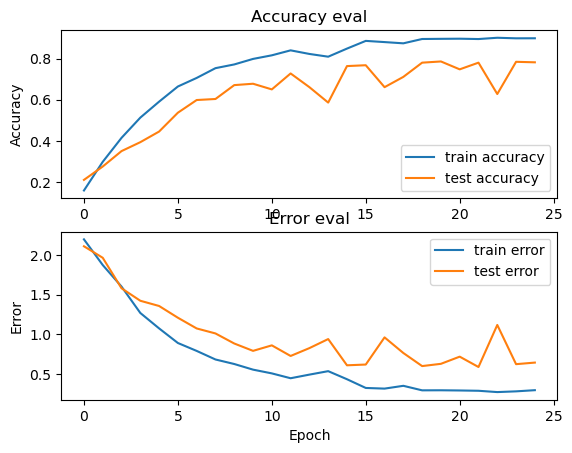

[0.7802999019622803, 0.09995835274457932, 0.6670137643814087, 0.5705955624580383, [0.20999999344348907, 0.2750000059604645, 0.3499999940395355, 0.3933333456516266, 0.4449999928474426, 0.5366666913032532, 0.5983333587646484, 0.6033333539962769, 0.6708333492279053, 0.6775000095367432, 0.6499999761581421, 0.7275000214576721, 0.6608333587646484, 0.5858333110809326, 0.7633333206176758, 0.7674999833106995, 0.6608333587646484, 0.7108333110809326, 0.7799999713897705, 0.7858333587646484, 0.7475000023841858, 0.7799999713897705, 0.6274999976158142, 0.784166693687439, 0.7816666960716248]]
[0.20999999344348907, 0.2750000059604645, 0.3499999940395355, 0.3933333456516266, 0.4449999928474426, 0.5366666913032532, 0.5983333587646484, 0.6033333539962769, 0.6708333492279053, 0.6775000095367432, 0.6499999761581421, 0.7275000214576721, 0.6608333587646484, 0.5858333110809326, 0.7633333206176758, 0.7674999833106995, 0.6608333587646484, 0.7108333110809326, 0.7799999713897705, 0.7858333587646484, 0.747500002384

In [68]:
graphs(history)
print(all_accs)
print(history.history['val_accuracy'])

In [66]:
model = complexCNN(160,160,3,10,0.5)
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
train, validation,  test = load_dataset()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)
history = model.fit(train, batch_size=128, epochs=50,  verbose=1, validation_data=validation, callbacks=[early_stopping])


test_loss, test_acc = model.evaluate(train, batch_size=128, verbose=1)
all_accs.append(history.history['val_accuracy'])
all_losses.append(history.history['val_loss'])






Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 332ms/step - accuracy: 0.1116 - loss: 2.2956 - val_accuracy: 0.2100 - val_loss: 2.1079
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 330ms/step - accuracy: 0.2628 - loss: 1.9365 - val_accuracy: 0.2750 - val_loss: 1.9632
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 52s 342ms/step - accuracy: 0.3882 - loss: 1.6627 - val_accuracy: 0.3500 - val_loss: 1.5802
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 331ms/step - accuracy: 0.4935 - loss: 1.3112 - val_accuracy: 0.3933 - val_loss: 1.4232
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.5807 - loss: 1.0972 - val_accuracy: 0.4450 - val_loss: 1.3574
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 328ms/step - accuracy: 0.6674 - loss: 0.9229 - val_accuracy: 0.5367 - val_loss: 1.2098
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 52s 339ms/step - accuracy: 0.6872 - loss: 0.8

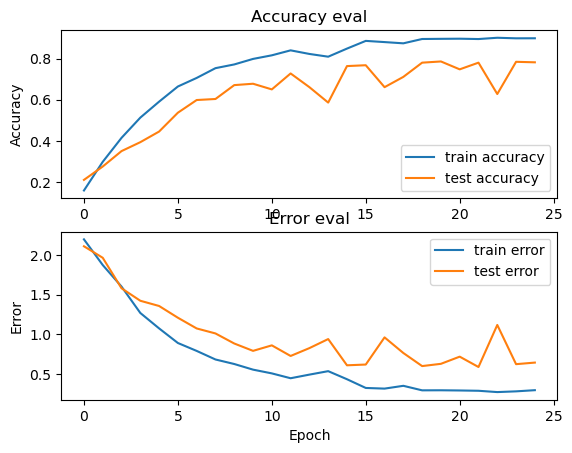

In [67]:
graphs(history)

## 3.2 Experiment-2: Different Optimizers

Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 56s 362ms/step - accuracy: 0.1104 - loss: 2.3044 - val_accuracy: 0.1208 - val_loss: 2.2985
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 55s 361ms/step - accuracy: 0.1189 - loss: 2.3001 - val_accuracy: 0.1292 - val_loss: 2.2971
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 53s 345ms/step - accuracy: 0.1224 - loss: 2.2959 - val_accuracy: 0.1242 - val_loss: 2.2941
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 56s 369ms/step - accuracy: 0.1417 - loss: 2.2826 - val_accuracy: 0.1683 - val_loss: 2.2870
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 56s 367ms/step - accuracy: 0.1523 - loss: 2.2723 - val_accuracy: 0.1400 - val_loss: 2.2697
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.2017 - loss: 2.2758
Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5
151/

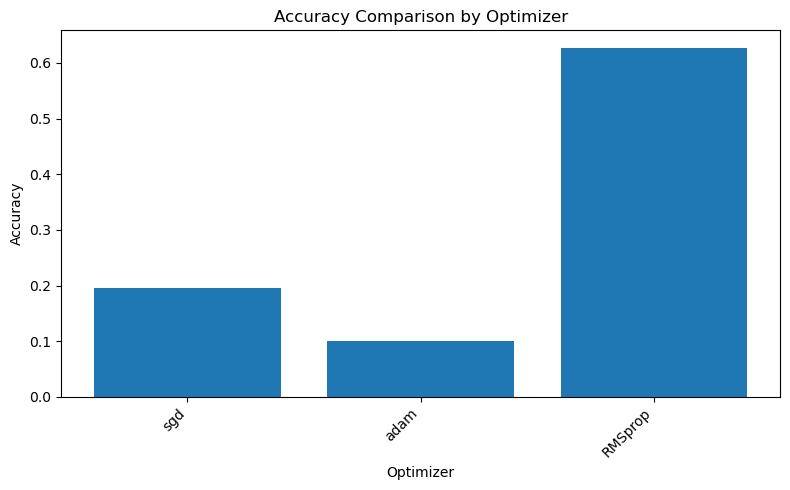

In [52]:
diff_optimizers = ['sgd', 'adam', 'RMSprop']
results = {}

for optimizer in diff_optimizers:
    train, validation, test = load_dataset() 
    model = complexCNN(160, 160, 3, 10, 0.5)
   
    if optimizer == 'sgd':
        opt = "SGD"  # May want to adjust learning rate
    elif optimizer == 'adam':
        opt = "Adam" # May want to adjust learning rate
    elif optimizer == 'RMSprop':
        opt = "RMSprop"  # May want to adjust learning rate
    
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    history = model.fit(train, batch_size=128, epochs=5, verbose=1, 
                        validation_data=validation, callbacks=[early_stopping])

    test_loss, test_acc = model.evaluate(train, batch_size=128, verbose=1)

    results[optimizer] = {
        'test_loss': test_loss, 
        'test_accuracy': test_acc,
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    }

# Plotting
optimizers = []
accuracies = []
for optimizer, data in results.items():
    optimizers.append(optimizer)
    accuracies.append(data['test_accuracy']) 

plt.figure(figsize=(8, 5))  # Adjust figure size as needed
plt.bar(optimizers, accuracies)
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Optimizer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

{'sgd': {'test_loss': 2.2759602069854736, 'test_accuracy': 0.19554352760314941, 'val_loss': [2.2984752655029297, 2.2971413135528564, 2.2941415309906006, 2.286982536315918, 2.2696921825408936], 'val_accuracy': [0.12083332985639572, 0.12916666269302368, 0.12416666746139526, 0.16833333671092987, 0.14000000059604645]}, 'adam': {'test_loss': 2.3026201725006104, 'test_accuracy': 0.09995835274457932, 'val_loss': [2.3026227951049805, 2.3028371334075928, 2.3026375770568848, 2.3026304244995117, 2.302621364593506], 'val_accuracy': [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612]}, 'RMSprop': {'test_loss': 1.0498899221420288, 'test_accuracy': 0.6272386312484741, 'val_loss': [2.0570034980773926, 1.611656904220581, 1.6146714687347412, 1.2487034797668457, 1.2281780242919922], 'val_accuracy': [0.23083333671092987, 0.3891666531562805, 0.4266666769981384, 0.5224999785423279, 0.5491666793823242]}}
[[0.12083332985639572, 0.12916666269302368, 0.12416

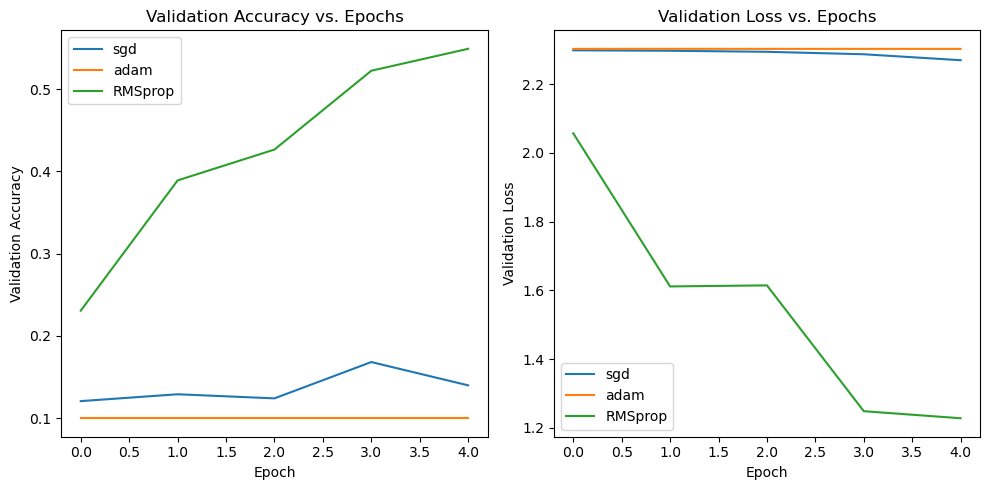

In [60]:
print(results)

test_accuracies = []
for optimizer, data in results.items():
    optimizers.append(optimizer)
    test_accuracies.append(data['val_accuracy']) 
print(test_accuracies)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
for optimizer, data in results.items():
    plt.plot(data['val_accuracy'], label=optimizer)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)  
for optimizer, data in results.items():
    plt.plot(data['val_loss'], label=optimizer)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## 3.3 Experiment-3: Different Dropout values

Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 323ms/step - accuracy: 0.1179 - loss: 2.2996 - val_accuracy: 0.2200 - val_loss: 2.1407
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 330ms/step - accuracy: 0.2868 - loss: 1.8911 - val_accuracy: 0.3683 - val_loss: 1.6628
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 320ms/step - accuracy: 0.4538 - loss: 1.4548 - val_accuracy: 0.5208 - val_loss: 1.2511
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 320ms/step - accuracy: 0.6195 - loss: 1.0386 - val_accuracy: 0.6117 - val_loss: 1.0092
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 50s 324ms/step - accuracy: 0.7077 - loss: 0.7997 - val_accuracy: 0.6267 - val_loss: 0.8792
151/151 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.7684 - loss: 0.6095
Found 4802 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 4100 images belonging to 10 classes.
Epoch 1/5
151/1

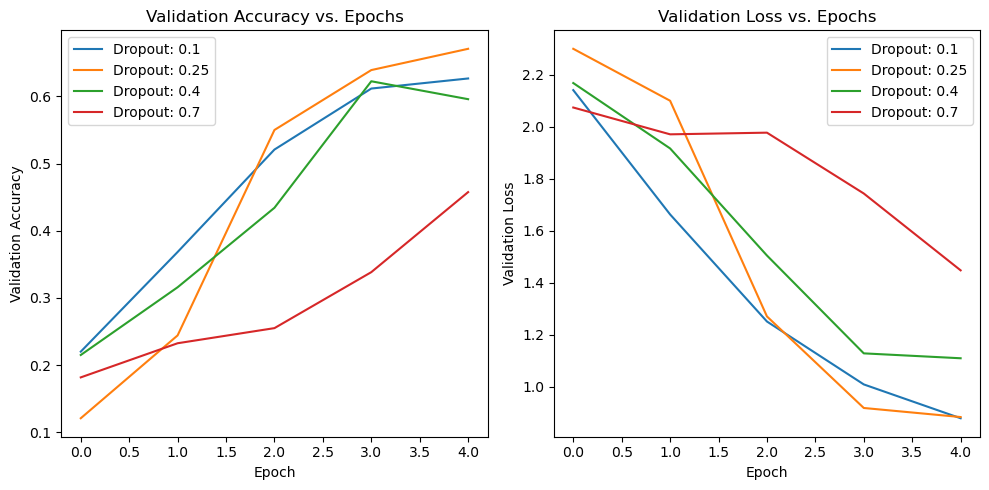

In [61]:
diff_dropout = [0.1, 0.25, 0.4, 0.7]
drop_resutls = {}

for dropout_rate in diff_dropout:
    train, validation, test = load_dataset() 
    model = complexCNN(160, 160, 3, 10, dropout_rate)  
   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    history = model.fit(train, batch_size=128, epochs=5, verbose=1, 
                        validation_data=validation, callbacks=[early_stopping])

    test_loss, test_acc = model.evaluate(train, batch_size=128, verbose=1)

    drop_resutls[dropout_rate] = {
        'test_loss': test_loss, 
        'test_accuracy': test_acc,
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy']
    }

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
for dropout_rate, data in drop_resutls.items():
    plt.plot(data['val_accuracy'], label=f'Dropout: {dropout_rate}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2) 
for dropout_rate, data in drop_resutls.items():
    plt.plot(data['val_loss'], label=f'Dropout: {dropout_rate}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [64]:
print(drop_resutls)




{0.1: {'test_loss': 0.6122549772262573, 'test_accuracy': 0.7694710493087769, 'val_loss': [2.140676975250244, 1.6627622842788696, 1.2511186599731445, 1.0092428922653198, 0.8791780471801758], 'val_accuracy': [0.2199999988079071, 0.3683333396911621, 0.5208333134651184, 0.6116666793823242, 0.6266666650772095]}, 0.25: {'test_loss': 0.5783141255378723, 'test_accuracy': 0.791961669921875, 'val_loss': [2.2995307445526123, 2.0998475551605225, 1.2706636190414429, 0.9186597466468811, 0.8838247656822205], 'val_accuracy': [0.12083332985639572, 0.24416667222976685, 0.550000011920929, 0.6391666531562805, 0.6708333492279053]}, 0.4: {'test_loss': 0.8657286763191223, 'test_accuracy': 0.683256983757019, 'val_loss': [2.1679165363311768, 1.9164377450942993, 1.5048285722732544, 1.128638744354248, 1.1098051071166992], 'val_accuracy': [0.2150000035762787, 0.31583333015441895, 0.43416666984558105, 0.6225000023841858, 0.5958333611488342]}, 0.7: {'test_loss': 1.1835230588912964, 'test_accuracy': 0.54727196693420

In [69]:
val_accuracies = []
val_losses = []
for optimizer, data in drop_resutls.items():
    val_accuracies.append(data['val_accuracy']) 
    val_losses.append(data['val_loss']) 
print(val_accuracies)
print(val_losses)

[[0.2199999988079071, 0.3683333396911621, 0.5208333134651184, 0.6116666793823242, 0.6266666650772095], [0.12083332985639572, 0.24416667222976685, 0.550000011920929, 0.6391666531562805, 0.6708333492279053], [0.2150000035762787, 0.31583333015441895, 0.43416666984558105, 0.6225000023841858, 0.5958333611488342], [0.18166667222976685, 0.23250000178813934, 0.2549999952316284, 0.3383333384990692, 0.45750001072883606]]
[[2.140676975250244, 1.6627622842788696, 1.2511186599731445, 1.0092428922653198, 0.8791780471801758], [2.2995307445526123, 2.0998475551605225, 1.2706636190414429, 0.9186597466468811, 0.8838247656822205], [2.1679165363311768, 1.9164377450942993, 1.5048285722732544, 1.128638744354248, 1.1098051071166992], [2.073843240737915, 1.9707295894622803, 1.9771357774734497, 1.7432096004486084, 1.4478294849395752]]
